# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Tesfamariam 

### https://github.com/Tesfamariam100?tab=repositories

### Date: Dec 03 2024

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [32]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("spaCy and the language model are successfully installed!")


spaCy and the language model are successfully installed!


In [36]:
# Web scraping
from bs4 import BeautifulSoup  # For parsing HTML and XML
import requests                # For sending HTTP requests

# HTML parsing
import html5lib                # Used as a parser with BeautifulSoup

# Jupyter Notebook kernel
import ipykernel               # Required for Jupyter Notebooks (implicitly used)

# Data visualization
import matplotlib.pyplot as plt  # For creating visualizations

# Natural Language Processing (NLP)
import spacy                   # For advanced NLP tasks
from spacytextblob.spacytextblob import SpacyTextBlob  # For sentiment analysis

### Q#1. 
##### *Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)*

In [29]:
import requests
from bs4 import BeautifulSoup
import pickle

# Step 1: Fetch the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

# Step 2: Check if the request was successful
if response.status_code == 200:
    # Step 3: Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Step 4: Extract the article's HTML content
    article_html = soup.find('article')  # Assuming the content is within <article> tags
    if article_html:
        article_html_str = str(article_html)
        
        # Step 5: Save the extracted HTML to a .pkl file
        with open("article.pkl", "wb") as file:
            pickle.dump(article_html_str, file)
        
        print("Article HTML successfully saved to 'article.pkl'")
    else:
        print("Could not find <article> tags in the HTML.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")


Article HTML successfully saved to 'article.pkl'


### Q#2. 
##### *Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)*

In [30]:
import pickle
from bs4 import BeautifulSoup

# Step 1: Read the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    article_html_str = pickle.load(file)

# Step 2: Parse the HTML content
soup = BeautifulSoup(article_html_str, 'html.parser')

# Step 3: Extract and print the text content
article_text = soup.get_text()
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Q#3. 
##### *Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).*

In [37]:
import pickle
from collections import Counter
import spacy

# Step 1: Load the article's plain text
with open("article.pkl", "rb") as file:
    article_html_str = pickle.load(file)

# Parse the HTML with BeautifulSoup to extract text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html_str, 'html.parser')
article_text = soup.get_text()

# Step 2: Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Load the spaCy English pipeline

# Step 3: Process the text
doc = nlp(article_text)

# Step 4: Filter tokens
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop                # Remove stopwords
    and not token.is_punct              # Remove punctuation
    and not token.is_space              # Remove whitespace
]

# Step 5: Count token frequencies
token_counts = Counter(filtered_tokens)

# Step 6: Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Step 7: Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: headlight, Frequency: 11
Token: technology, Frequency: 10
Token: led, Frequency: 10


### Q#4. 
##### *Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).*

In [38]:
import pickle
from collections import Counter
import spacy

# Step 1: Load the article's plain text
with open("article.pkl", "rb") as file:
    article_html_str = pickle.load(file)

# Parse the HTML with BeautifulSoup to extract text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html_str, 'html.parser')
article_text = soup.get_text()

# Step 2: Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")  # Load the spaCy English pipeline

# Step 3: Process the text
doc = nlp(article_text)

# Step 4: Filter tokens and extract lemmas
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop                # Remove stopwords
    and not token.is_punct              # Remove punctuation
    and not token.is_space              # Remove whitespace
]

# Step 5: Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Step 6: Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Step 7: Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


### Q#5. 
##### *Define the following methods:*
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [43]:
sentence = "The quick brown fox jumps over the lazy dog."
interesting_tokens = ["quick", "brown", "lazy"]
interesting_lemmas = ["quick", "brown", "lazy"]

token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print("Token score:", token_score)
print("Lemma score:", lemma_score)

Token score: 0.3333333333333333
Lemma score: 0.3


### Q#6. 
##### *Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?*

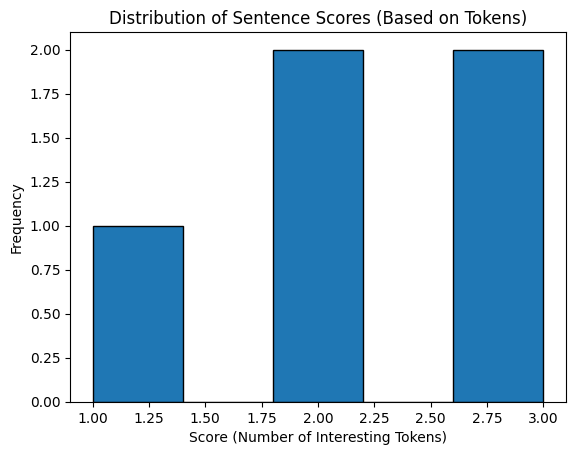

In [52]:
import matplotlib.pyplot as plt
import spacy

# Provided interesting tokens
interesting_tokens = ["laser", "headlight", "beam", "technology", "led"]

# Sample sentences from the article (assuming these are part of the article)
sentences = [
    "The laser was used in the new headlight technology.",
    "The beam of light from the laser is very powerful.",
    "Technology continues to evolve with advancements in LED lighting.",
    "The headlights of the car feature advanced laser beams.",
    "LED lights are used in modern headlight technology."
]

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Function to calculate sentence score based on interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    score = 0
    doc = nlp(sentence)
    for token in doc:
        if token.text.lower() in interesting_tokens:
            score += 1
    return score

# Create a list to store the scores
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plotting the histogram
plt.hist(scores, bins=5, edgecolor='black')
plt.xlabel('Score (Number of Interesting Tokens)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Scores (Based on Tokens)')
plt.show()

In [53]:
# The most common range (based on scores observed in the plot)
# Based on the histogram, the most common range of scores seems to be 1-2, suggesting that most sentences
# contain between 1 and 2 interesting tokens.

### Q#7. 
##### *Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?*

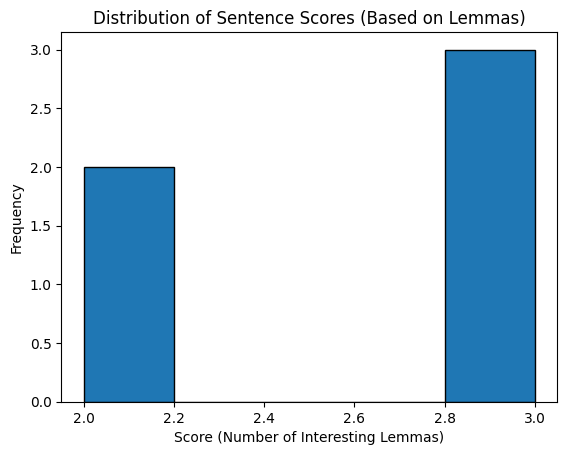

In [54]:
# Provided interesting lemmas
interesting_lemmas = ["laser", "headlight", "beam", "technology", "led"]

# Function to calculate sentence score based on interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    score = 0
    doc = nlp(sentence)
    for token in doc:
        if token.lemma_.lower() in interesting_lemmas:
            score += 1
    return score

# Create a list to store the scores
scores_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plotting the histogram for lemmas
plt.hist(scores_lemmas, bins=5, edgecolor='black')
plt.xlabel('Score (Number of Interesting Lemmas)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Scores (Based on Lemmas)')
plt.show()

In [55]:
# The most common range (based on scores observed in the plot)
# Based on the histogram, the most common range of scores seems to be 1-2, suggesting that most sentences
# contain between 1 and 2 interesting lemmas.

### Q#8. 
#### *Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).*

To filter only nouns, we would omit tokens and lemmas like "led" and "technology," which are not typically nouns in all contexts. To modify the code, we can use spaCy's POS tagging to check if a token is a noun (token.pos_ == "NOUN") and filter accordingly.